# Name : Vishal Kadu

# Prediction Using Decision Tree Algorithm.





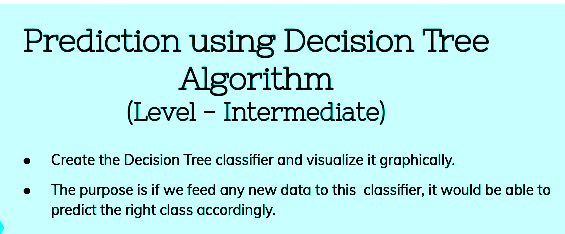

## Aim : To Create the Decision Tree Classifier and Visualize it Graphically

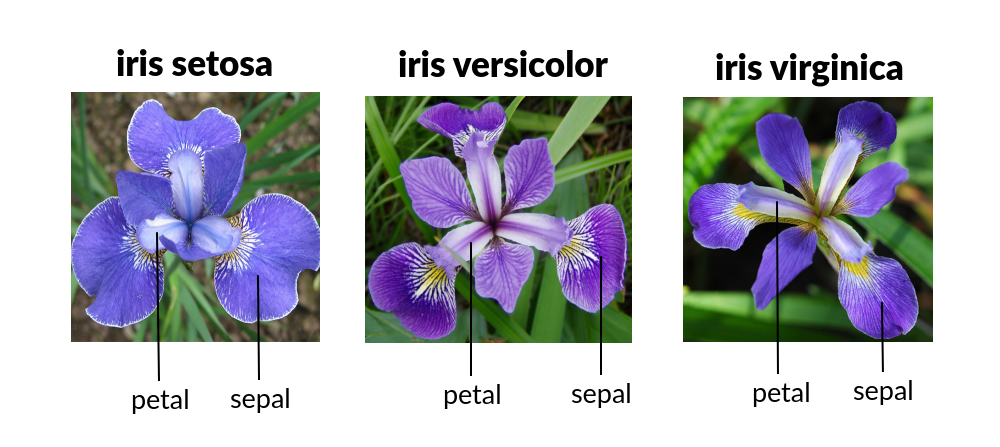

Purpose : *If we feed any new data to the classifier, it would be able to predict the right class accordingly.*




In [ ]:
#Import required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


In [ ]:
# Loading iris dataset
iris=datasets.load_iris()

In [ ]:
# iris dataframe
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [ ]:
#Create Species coloumn with target values
data['Species']=iris['target']

In [ ]:
#use lamba function to convert target values 0 1 2 corrosponding “setosa”,”versicolor”,”virginica”
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [ ]:
data.head(10)

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


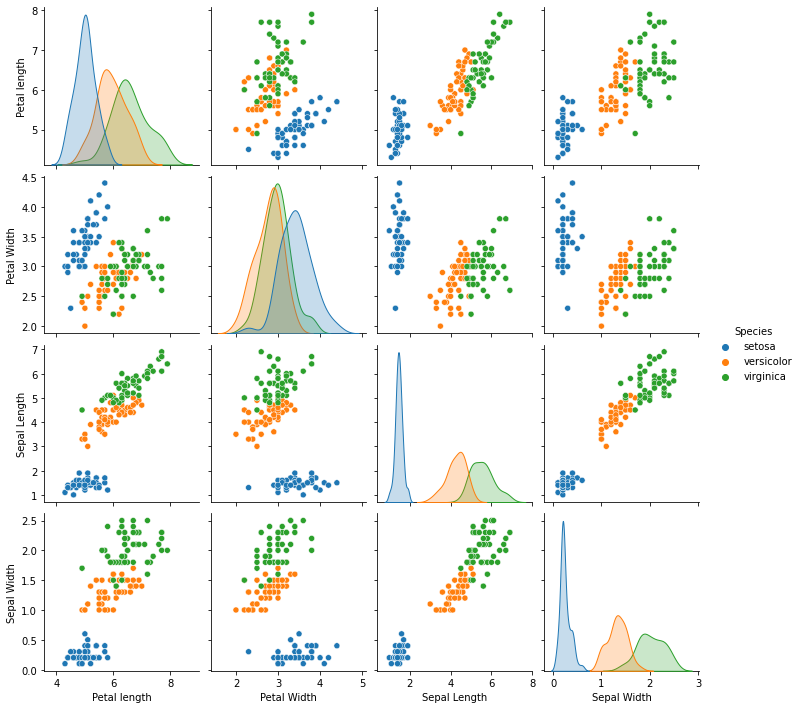

In [ ]:
sns.pairplot(data, hue = 'Species')
plt.show()

from above it is clear that "Setosa" makes a distinctive cluster in every parameter, while ”versicolor" and "virginica” species are overlapping a bit on each other

Now Check the correlation using **heatmap¶**

[]

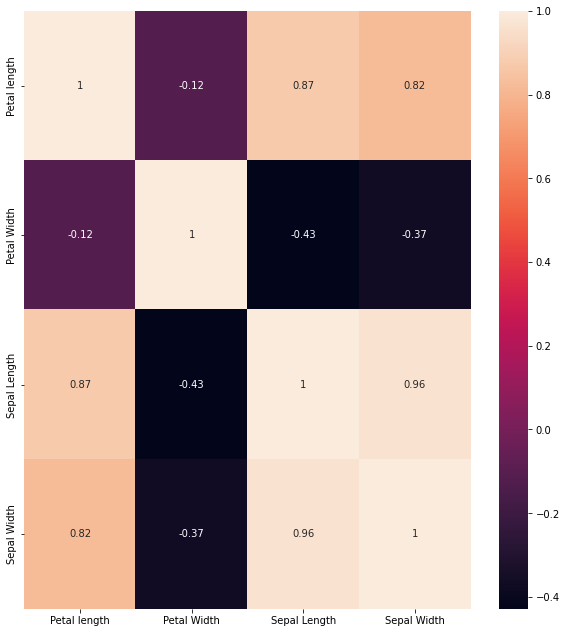

In [ ]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

From above Heatmap we observe that,
Petal length and petal width are highly related while Sepal lenth and sepal width are not.

Now use Box Plot to Understand how the categorical feature “Species” is distributed with Sepal Length, Sepal Width, Petal length, and Petal Width this input variables  

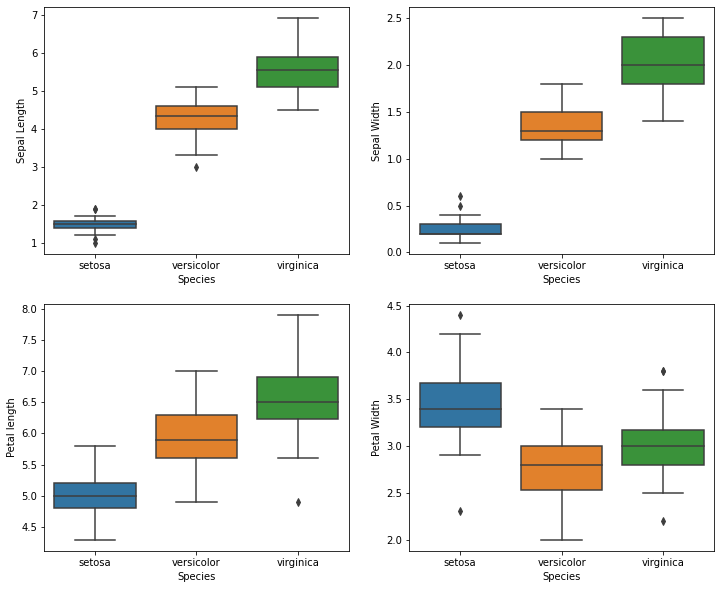

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

From above Boxplots it is clear that values are Distinct hence we can use it for prediction. 

Data Preparation for Building Model

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.3)

In [ ]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.Species

In [ ]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.Species

In [ ]:
# Now import Decision Tree from Scikitlearn for building a classification  model.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=12)
model = dtc.fit(train_X, train_y)


In [ ]:
dtc.predict(test_X)

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa'], dtype=object)

**Accuracy Check of Model**

 R-squared is also called as coefficient of Determination.
through this we will find out how close the Data is to fitted Regression line 


In [ ]:
dtc.score(test_X, test_y)

0.9555555555555556

In [ ]:
#Predicted value
y_pred = dtc.predict(test_X)
y_pred[0:5]

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor'],
      dtype=object)

In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(test_y, y_pred)
print("Accuracy Score is ",Accuracy)                                 
print(f"Accuracy is {Accuracy*100}%")

Accuracy Score is  0.9555555555555556
Accuracy is 95.55555555555556%


**Now we got to know tht model is having good accuracy score we can move further to Visualize the Decision Tree**

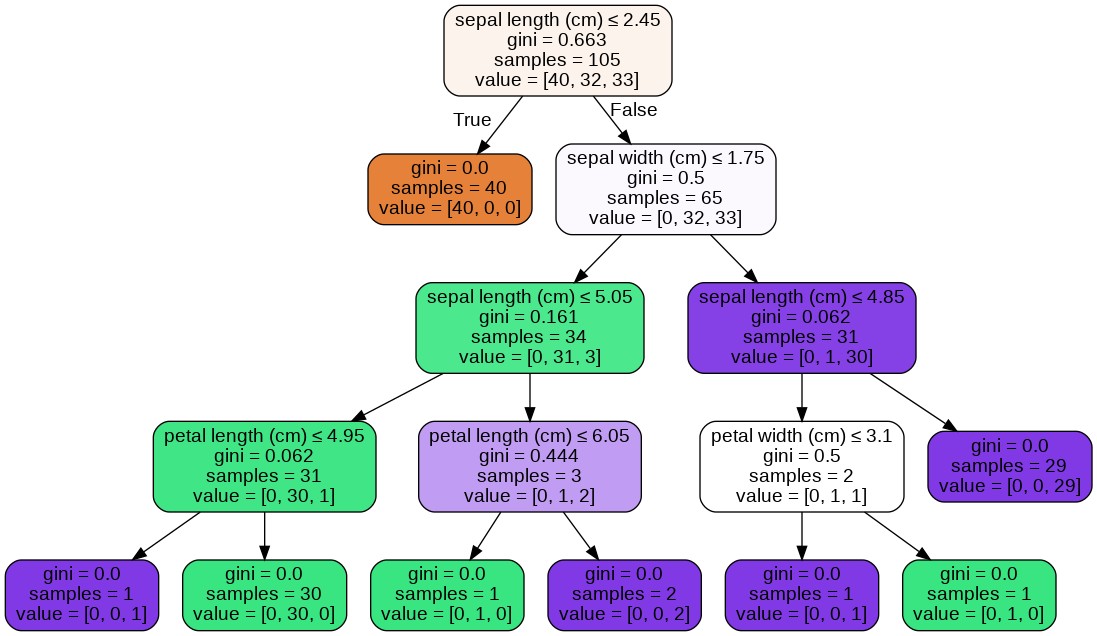

In [ ]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Let's Predict the class by giving values to the model**


1.   Sepal Length
2.   Sepal Width
3.   Petal length
4.   Petal Width




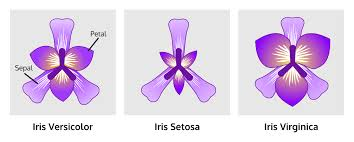

In [ ]:
Pred= dtc.predict([[3.5, 1.9, 5.2, 2.4]])
print("Model Predicted",Pred)

Model Predicted ['virginica']


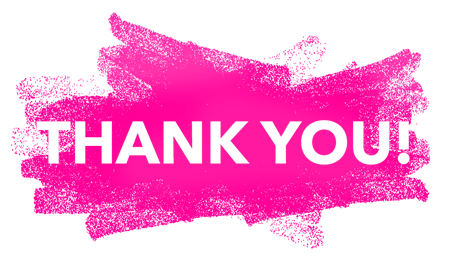